<a href="https://colab.research.google.com/github/hongphuong298/hongphuong_ead/blob/main/b%E1%BA%A3n_3%5C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

data_science_bowl_2018_path = kagglehub.competition_download('data-science-bowl-2018')

print('Data source import complete.')


100%|██████████| 358M/358M [00:03<00:00, 107MB/s]

Extracting files...


Data source import complete.


In [ ]:
from google.colab import files

# Tải lại file kaggle.json
uploaded = files.upload()

# Kiểm tra xem file đã được tải lên chưa
print(uploaded)


Saving kaggle.json to kaggle.json
{'kaggle.json': b'{"username":"lethihongphuong","key":"3d84c164e05706a93d0e9f59f611618e"}'}


In [ ]:
import os
import shutil

# Đường dẫn tới thư mục và tệp
destination_path = '/root/.kaggle/kaggle.json'

# Tạo thư mục .kaggle nếu chưa có
os.makedirs('/root/.kaggle', exist_ok=True)



# Di chuyển tệp kaggle.json vào thư mục .kaggle
shutil.move('kaggle.json', destination_path)


'/root/.kaggle/kaggle.json'

In [ ]:
# Cấp quyền cho file để sử dụng
os.chmod('/root/.kaggle/kaggle.json', 600)


In [ ]:
# rm -rf /content/data-science-bowl-2018

In [ ]:
!kaggle competitions download -c data-science-bowl-2018


 97% 347M/358M [00:01<00:00, 264MB/s]
100% 358M/358M [00:01<00:00, 262MB/s]


In [ ]:
import zipfile

# Đường dẫn đến file zip đã tải
zip_path = '/content/data-science-bowl-2018.zip'

# Thư mục đích để giải nén
extract_to = '/content/data-science-bowl-2018'

# Giải nén
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print(f"Dataset extracted to: {extract_to}")


Dataset extracted to: /content/data-science-bowl-2018


In [ ]:
!pip install -U albumentations

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.0/66.0 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 269.9/269.9 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 632.7/632.7 kB 26.9 MB/s eta 0:00:00
  Attempting uninstall: albucore
    Found existing installation: albucore 0.0.19
    Uninstalling albucore-0.0.19:
      Successfully uninstalled albucore-0.0.19
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.4.20
    Uninstalling albumentations-1.4.20:
      Successfully uninstalled albumentations-1.4.20


In [ ]:
import os
import time
import copy
from collections import defaultdict
import torch
import shutil
import pandas as pd
from skimage import io, transform
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms, utils
from torch import nn
from albumentations import (HorizontalFlip, ShiftScaleRotate, Normalize, Resize, Compose, GaussNoise)
import cv2
import torchvision.transforms as transforms
from torch.autograd import Variable
from torch.nn import Linear, ReLU, CrossEntropyLoss,Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout
from torch.optim import Adam, SGD
import torch.nn.functional as F
from PIL import Image
from torch import nn
import zipfile
import tqdm
import random

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

def reset_seed():
  torch.manual_seed(42)
  random.seed(42)
  torch.cuda.manual_seed(42)
reset_seed()

In [ ]:
!git clone https://github.com/SLDGroup/EMCAD.git

Cloning into 'EMCAD'...
remote: Enumerating objects: 195, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 195 (delta 7), reused 0 (delta 0), pack-reused 177 (from 1)
Receiving objects: 100% (195/195), 2.02 MiB | 5.72 MiB/s, done.
Resolving deltas: 100% (77/77), done.


In [ ]:
import zipfile
import os

# Đường dẫn đến file zip
zip_path = '/content/data-science-bowl-2018/stage1_train.zip'

# Thư mục đích để giải nén
extract_to = '/content/EMCAD/data'

# Tạo thư mục đích nếu chưa tồn tại
os.makedirs(extract_to, exist_ok=True)

# Giải nén file zip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print(f"Dataset extracted to: {extract_to}")


Dataset extracted to: /content/EMCAD/data


In [ ]:
seed = 42
np.random.seed = seed

img_size = 256
IMG_WIDTH = img_size
IMG_HEIGHT = img_size
IMG_CHANNELS = 3

In [ ]:
cd /content/EMCAD

/content/EMCAD


In [ ]:
!pip install -r /content/EMCAD/requirements.txt

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.3/156.3 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 926.4/926.4 kB 30.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.4/52.4 MB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 9.5 MB/s eta 0:00:00
  Created wheel for warmup-scheduler: filename=warmup_scheduler-0.3-py3-none-any.whl size=2971 sha256=948174be6d5f0cffa6708a9dbd751dd88e37d487ecf9f3a53dd63d2482660f3f
  Stored in directory: /root/.cache/pip/wheels/59/01/9e/d1820991c32916e9808c940f572b462f3e46427f3e76c4d852
  Created wheel for medpy: filename=MedPy-0.5.2-cp310-cp310-linux_x86_64.whl size=762842 sha256=3790da0a8f52e3d83cd2c9abf6b0517cf4405a04b14ada323108092b4474a350
  Sto

In [ ]:
import os
os.chdir('/content/EMCAD/lib/')


In [ ]:
import argparse
import logging
import os
import random
import numpy as np
import torch
import torch.nn as nn
import torch.backends.cudnn as cudnn
from EMCAD.lib.networks import EMCADNet



In [ ]:
import sys
import torch.optim as optim
from torch.nn import CrossEntropyLoss
from torch.utils.data import Dataset
from torch.utils.tensorboard import SummaryWriter
from tqdm import tqdm
from skimage import io, transform
import albumentations as A
from albumentations.pytorch import ToTensorV2


In [ ]:
# !mkdir /content/EMCAD/pretrained_pth/pvt

In [ ]:
ls /content/EMCAD/pretrained_pth/pvt

pvt_v2_b0.pth  pvt_v2_b2_li.pth  pvt_v2_b3.pth  pvt_v2_b5.pth
pvt_v2_b1.pth  pvt_v2_b2.pth     pvt_v2_b4.pth


In [ ]:
cd /content/EMCAD/lib

/content/EMCAD/lib


In [ ]:
import os
import numpy as np
import logging
from tqdm import tqdm
from skimage import io, transform
import torch
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
from torch.utils.tensorboard import SummaryWriter
from albumentations import Compose, HorizontalFlip, Normalize
from albumentations.pytorch import ToTensorV2

# Hàm tạo augmentations
def get_transforms(mean, std):
    return Compose([
        HorizontalFlip(p=0.5),
        Normalize(mean=mean, std=std, p=1.0),
        ToTensorV2()
    ])

# Dataset class
class NucleiData(Dataset):
    def __init__(self, path):
        self.path = path
        self.folders = os.listdir(path)
        self.transforms = get_transforms(mean=0.5, std=0.5)

    def __len__(self):
        return len(self.folders)

    def __getitem__(self, idx):
        image_folder = os.path.join(self.path, self.folders[idx], 'images/')
        mask_folder = os.path.join(self.path, self.folders[idx], 'masks/')
        image_path = os.path.join(image_folder, os.listdir(image_folder)[0])

        # Read and preprocess image
        img = io.imread(image_path)[:, :, :3].astype('float32')
        img = transform.resize(img, (128, 128))

        # Get mask
        mask = self.get_mask(mask_folder, 128, 128)

        # Apply transformations
        augmented = self.transforms(image=img, mask=mask)
        img = augmented['image']  # [3, 128, 128]
        mask = augmented['mask']


        mask = mask.permute(2, 0, 1)  # Change from [H, W, C] to [C, H, W]

        print("Image size after transform: ", img.shape)      # Should be [3, 128, 128]
        print("Mask size after transform: ", mask.shape)      # Should be [1, 128, 128]




        # print("Image size: ", img.shape)
        # print("Mask size: ", mask.shape)

        # # Ensure mask shape is [1, H, W]
        # if mask.ndim == 2:
        #     mask = mask[None, :, :]
        # # elif mask.ndim == 3:
        # #     mask = mask.permute(2, 0, 1)

        # elif mask.ndim == 3 and mask.shape[2] == 1:
        #   mask = mask.permute(2, 0, 1)  # Nếu mặt nạ có 3 chiều nhưng chỉ có 1 kênh
        # assert mask.shape[0] == 1, f"Mask shape should have 1 channel, but got {mask.shape[0]}"


        return {
            "image": img.clone().detach().float(),
            "label": mask.clone().detach().float()

        }

    def get_mask(self, mask_folder, IMG_HEIGHT, IMG_WIDTH):
        mask = np.zeros((IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.float32)
        for mask_ in os.listdir(mask_folder):
            mask_ = io.imread(os.path.join(mask_folder, mask_))
            mask_ = transform.resize(mask_, (IMG_HEIGHT, IMG_WIDTH))
            mask_ = np.expand_dims(mask_, axis=-1)
            mask = np.maximum(mask, mask_)
        return mask



In [ ]:
# class DiceLoss:
#     def __init__(self, smooth=1e-5):
#         self.smooth = smooth

#     def compute_single_dice(self, pred, target):
#         """Calculate dice loss for a single prediction"""
#         # Get the first channel if binary classification
#         if pred.shape[1] > 1:
#             pred = pred[:, 0:1, :, :]

#         # Apply sigmoid
#         pred = torch.sigmoid(pred)

#         # Flatten prediction and target
#         pred = pred.view(-1)
#         target = target.view(-1)

#         # Calculate intersection and union
#         intersection = (pred * target).sum()
#         union = pred.sum() + target.sum()

#         # Calculate Dice coefficient
#         dice = (2. * intersection + self.smooth) / (union + self.smooth)

#         return 1 - dice

#     def __call__(self, inputs, targets):
#         # Handle multiple outputs
#         if isinstance(inputs, list):
#             # Calculate loss for each output
#             losses = []
#             weights = [0.5, 0.7, 0.9, 1.0]  # Weights for different outputs, giving more importance to later outputs

#             for i, pred in enumerate(inputs):
#                 loss = self.compute_single_dice(pred, targets)
#                 losses.append(loss * weights[i])

#             # Return weighted sum of losses
#             return sum(losses)
#         else:
#             # Handle single output case
#             return self.compute_single_dice(inputs, targets)


In [ ]:
# import os
# import numpy as np
# from skimage import io, transform
# from torch.utils.data import Dataset
# import albumentations as A
# from albumentations.pytorch import ToTensorV2

# def get_transforms(mean, std):
#     list_transforms = A.Compose([
#         A.HorizontalFlip(p=0.5),
#         A.Normalize(mean=mean, std=std, p=1.0),
#         ToTensorV2()
#     ])
#     return list_transforms

# class NucleiData(Dataset):
#     def __init__(self, path):
#         self.path = path
#         self.folders = os.listdir(path)
#         self.transforms = get_transforms(0.5, 0.5)

#     def __len__(self):
#         return len(self.folders)

#     def __getitem__(self, idx):
#         image_folder = os.path.join(self.path, self.folders[idx], 'images/')
#         mask_folder = os.path.join(self.path, self.folders[idx], 'masks/')
#         image_path = os.path.join(image_folder, os.listdir(image_folder)[0])

#         # Read and preprocess image
#         img = io.imread(image_path)[:, :, :3].astype('float32')
#         img = transform.resize(img, (128, 128))

#         # Get mask and ensure it's float32
#         mask = self.get_mask(mask_folder, 128, 128).astype('float32')

#         # Apply transformations
#         augmented = self.transforms(image=img, mask=mask)
#         img = augmented['image']  # This will be [3, 128, 128]
#         mask = augmented['mask']

#         # Reshape mask to [1, 128, 128]
#         mask = mask.permute(2, 0, 1)  # Change from [128, 128, 1] to [1, 128, 128]

#         return img, mask

#     def get_mask(self, mask_folder, IMG_HEIGHT, IMG_WIDTH):
#         mask = np.zeros((IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool_)
#         for mask_ in os.listdir(mask_folder):
#             mask_ = io.imread(os.path.join(mask_folder, mask_))
#             mask_ = transform.resize(mask_, (IMG_HEIGHT, IMG_WIDTH))
#             mask_ = np.expand_dims(mask_, axis=-1)
#             mask = np.maximum(mask, mask_)
#         return mask



In [ ]:
#loading the data
base_dir = '/content/EMCAD/data/'
data = NucleiData(base_dir)

In [ ]:
print(data.__len__())
data.__getitem__(0)

670


(tensor([[[0.3959, 0.4066, 0.4049,  ..., 0.3895, 0.3857, 0.4111],
          [0.4025, 0.4286, 0.4187,  ..., 0.3803, 0.3939, 0.4158],
          [0.4282, 0.4334, 0.4155,  ..., 0.3732, 0.3970, 0.4171],
          ...,
          [0.4007, 0.3972, 0.3908,  ..., 0.4033, 0.4065, 0.3923],
          [0.4124, 0.4050, 0.3868,  ..., 0.3976, 0.4033, 0.3566],
          [0.4159, 0.4157, 0.4200,  ..., 0.4074, 0.3922, 0.3324]],
 
         [[0.2602, 0.2667, 0.2904,  ..., 0.2863, 0.2532, 0.2584],
          [0.2665, 0.2862, 0.2870,  ..., 0.2586, 0.2511, 0.2741],
          [0.2860, 0.2903, 0.2622,  ..., 0.2477, 0.2570, 0.2773],
          ...,
          [0.2472, 0.2555, 0.2530,  ..., 0.2654, 0.2565, 0.2431],
          [0.2656, 0.2613, 0.2439,  ..., 0.2603, 0.2484, 0.1993],
          [0.2706, 0.2759, 0.2632,  ..., 0.2679, 0.2458, 0.1707]],
 
         [[0.6190, 0.6275, 0.6423,  ..., 0.6353, 0.6345, 0.6351],
          [0.6289, 0.6455, 0.6570,  ..., 0.6244, 0.6260, 0.6360],
          [0.6423, 0.6408, 0.6457,  ...,

In [ ]:
for img,msk in data:
  print(img.shape)
  print(msk.shape)
  break

torch.Size([3, 128, 128])
torch.Size([1, 128, 128])


In [ ]:
def mask_convert(mask):
    mask = mask.clone().cpu().detach().numpy()
    mask = mask.transpose((1,2,0))
    std = np.array((0.5))
    mean = np.array((0.5))
    mask  = std * mask + mean
    mask = mask.clip(0,1)
    mask = np.squeeze(mask)
    return mask

# converting tensor to image
def image_convert(image):
    image = image.clone().cpu().numpy()
    image = image.transpose((1,2,0))
    std = np.array((0.5,0.5,0.5))
    mean = np.array((0.5,0.5,0.5))
    image  = std * image + mean
    image = image.clip(0,1)
    image = (image * 255).astype(np.uint8)
    return image

In [ ]:
def plot_img(no_):
    iter_ = iter(train_loader)
    images,masks = next(iter_)
    images = images.to(device)
    masks = masks.to(device)
    plt.figure(figsize=(10,6))
    for idx in range(0,no_):
         image = image_convert(images[idx])
         plt.subplot(2,no_,idx+1)
         plt.title('image')
         plt.imshow(image)
    for idx in range(0,no_):
         mask = mask_convert(masks[idx])
         plt.subplot(2,no_,idx+no_+1)
         plt.title('mask')
         plt.imshow(mask,cmap='gray')
    plt.show()

In [ ]:

trainset, valset = random_split(data, [580, 90])

train_loader = torch.utils.data.DataLoader(dataset=trainset, batch_size=10, shuffle=True)

val_loader = torch.utils.data.DataLoader(dataset=valset, batch_size=10)

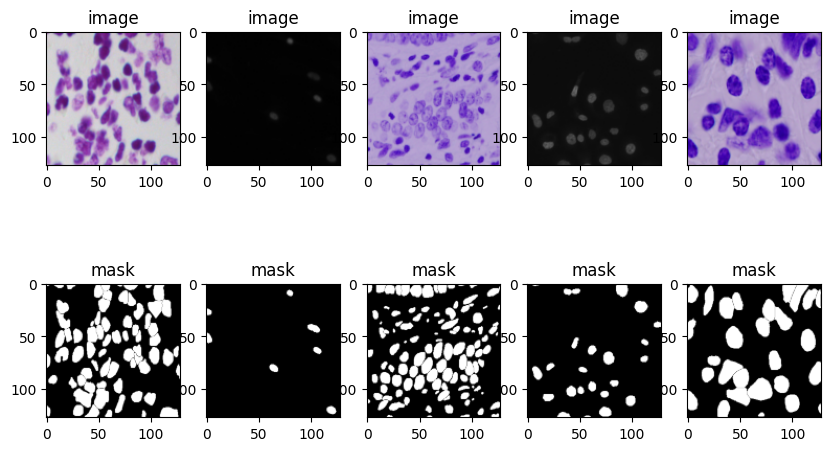

In [ ]:
plot_img(5)


In [ ]:
cd /content/EMCAD/utils


/content/EMCAD/utils


In [ ]:
ls /content/EMCAD/utils

dataloader.py       format_conversion.py  preprocess_synapse_data_3d.py  README.md
dataset_ACDC.py     joint_transforms.py   preprocess_synapse_data.py     transforms.py
dataset_synapse.py  misc.py               __pycache__/                   utils.py


In [ ]:
import os
import shutil
import logging
import sys
import torch
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from tensorboardX import SummaryWriter
# from utils.dataset_nuclei import NucleiData
# from utils.utils import powerset, one_hot_encoder, DiceLoss, val_single_volume
from EMCAD.lib.networks import EMCADNet
from tqdm.notebook import tqdm  # Import tqdm cho Jupyter Notebook

In [ ]:
from EMCAD.utils.utils import powerset, one_hot_encoder, DiceLoss, val_single_volume

In [ ]:
# rm -rf /content/EMCAD/lib/EMCAD

In [ ]:
import os
import shutil
import logging
import sys
import torch
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from tensorboardX import SummaryWriter
from tqdm.notebook import tqdm  # Import tqdm cho Jupyter Notebook


In [ ]:

# # Tạo đối tượng args trực tiếp (thay vì sử dụng argparse)
# args = {
#     'volume_path': '/content/EMCAD/data/',
#     'num_classes': 2,
#     'batch_size': 10,
#     'max_epochs': 50,
#     'base_lr': 1e-4,
#     'n_gpu': 1,
#     'img_size': 256,
#     'list_dir': './train_val_split',
#     'kernel_sizes': [1, 3, 5],
#     'expansion_factor': 2,
#     'dw_parallel': True,
#     'activation': 'relu',
#     'encoder': 'pvt_v2_b2',
#     'pretrain': True
# }

# # Hàm huấn luyện mô hình
# def trainer_nuclei(args, model, snapshot_path):
#     logging.basicConfig(filename=snapshot_path + "/log.txt", level=logging.INFO,
#                         format='[%(asctime)s.%(msecs)03d] %(message)s', datefmt='%H:%M:%S')
#     logging.getLogger().addHandler(logging.StreamHandler(sys.stdout))
#     logging.info(str(args))

#     # Cấu hình các tham số
#     base_lr = args['base_lr']
#     num_classes = args['num_classes']
#     batch_size = args['batch_size'] * args['n_gpu']
#     device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#     # Tạo dataset và DataLoader

#     data = NucleiData(base_dir)
#     trainset, valset = random_split(data, [580, 90])
#     train_loader = DataLoader(dataset=trainset, batch_size=batch_size, shuffle=True)
#     val_loader = DataLoader(dataset=valset, batch_size=batch_size)

#     model.to(device)

#     # Mất mát và tối ưu hóa
#     dice_loss = DiceLoss(num_classes)
#     optimizer = optim.AdamW(model.parameters(), lr=base_lr, weight_decay=0.0001)
#     writer = SummaryWriter(snapshot_path + '/log')

#     max_epoch = args['max_epochs']
#     best_performance = 0.0

#     # Huấn luyện mô hình với tqdm
#     for epoch_num in range(max_epoch):
#         model.train()
#         # Dùng tqdm để tạo thanh tiến độ cho vòng lặp huấn luyện
#         with tqdm(train_loader, desc=f'Epoch {epoch_num + 1}/{max_epoch}', unit='batch') as pbar:
#             for i_batch, sampled_batch in enumerate(pbar):
#                 image_batch, label_batch = sampled_batch['image'].cuda(), sampled_batch['label'].squeeze(1).cuda()

#                 # Forward pass
#                 outputs = model(image_batch)
#                 loss = dice_loss(outputs, label_batch)

#                 # Backward pass và cập nhật trọng số
#                 optimizer.zero_grad()
#                 loss.backward()
#                 optimizer.step()

#                 # Log các giá trị
#                 writer.add_scalar('info/loss', loss.item(), epoch_num * len(train_loader) + i_batch)

#                 pbar.set_postfix(loss=loss.item())  # Cập nhật thanh tiến độ với giá trị loss
#                 if i_batch % 50 == 0:
#                     logging.info('Epoch [%d/%d], Batch [%d/%d], Loss: %.4f', epoch_num + 1, max_epoch, i_batch, len(train_loader), loss.item())

#         # Lưu mô hình sau mỗi epoch
#         save_mode_path = os.path.join(snapshot_path, f'epoch_{epoch_num + 1}.pth')
#         torch.save(model.state_dict(), save_mode_path)

#         # Kiểm tra hiệu suất trên tập validation
#         performance = inference(args, model, best_performance)
#         if best_performance < performance:
#             best_performance = performance
#             best_model_path = os.path.join(snapshot_path, 'best_model.pth')
#             torch.save(model.state_dict(), best_model_path)
#             logging.info(f"Saved best model to {best_model_path}")

#         logging.info(f"Epoch {epoch_num + 1} completed.")

#     writer.close()
#     return "Training Finished!"

# # Hàm kiểm tra hiệu suất mô hình trên tập test
# def inference(args, model, best_performance):
#     test_data = NucleiData(base_dir=args['volume_path'], split="test")
#     test_loader = DataLoader(test_data, batch_size=1, shuffle=False)

#     model.eval()
#     metric_list = []

#     # Dùng tqdm để tạo thanh tiến độ cho vòng lặp kiểm tra
#     with tqdm(test_loader, desc="Testing", unit='batch') as pbar:
#         for i_batch, sampled_batch in enumerate(pbar):
#             image, label, case_name = sampled_batch["image"].cuda(), sampled_batch["label"].cuda(), sampled_batch["case_name"]
#             outputs = model(image)

#             # Tính toán và lưu metric, ví dụ: Dice score
#             dice_score = val_single_volume(outputs, label)
#             metric_list.append(dice_score)
#             pbar.set_postfix(dice_score=dice_score)  # Cập nhật thanh tiến độ với giá trị Dice score

#     mean_dice = np.mean(metric_list)
#     logging.info(f'Mean Dice score on test set: {mean_dice:.4f}')

#     if mean_dice > best_performance:
#         best_performance = mean_dice
#         logging.info(f"New best performance: {best_performance:.4f}")

#     return best_performance



In [ ]:
def trainer_nuclei(args, model, snapshot_path):
    logging.basicConfig(filename=snapshot_path + "/log.txt", level=logging.INFO,
                        format='[%(asctime)s.%(msecs)03d] %(message)s', datefmt='%H:%M:%S')
    logging.getLogger().addHandler(logging.StreamHandler())
    logging.info(str(args))

    base_lr = args['base_lr']
    num_classes = args['num_classes']
    batch_size = args['batch_size'] * args['n_gpu']
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Dataset and DataLoader setup
    data = NucleiData(args['volume_path'])
    trainset, valset = random_split(data, [580, 90])
    train_loader = DataLoader(dataset=trainset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(dataset=valset, batch_size=batch_size)

    model.to(device)

    dice_loss = DiceLoss(num_classes)
    ce_loss = CrossEntropyLoss()
    optimizer = optim.AdamW(model.parameters(), lr=base_lr, weight_decay=0.0001)
    writer = SummaryWriter(snapshot_path + '/log')

    max_epoch = args['max_epochs']
    best_performance = 0.0

    # Deep Supervision Setup
    out_idxs = list(range(num_classes))
    ss = [[x] for x in out_idxs]

    for epoch_num in range(max_epoch):
        model.train()
        epoch_loss = 0
        with tqdm(train_loader, desc=f'Epoch {epoch_num + 1}/{max_epoch}', unit='batch') as pbar:
            for i_batch, sampled_batch in enumerate(pbar):
                image_batch = sampled_batch['image'].to(device)
                label_batch = sampled_batch['label'].squeeze(1).to(device)

                # Forward pass
                outputs = model(image_batch)

                # Handle different output formats
                if isinstance(outputs, list):
                    # For deep supervision output
                    total_loss = 0
                    for output in outputs:
                        # Ensure output and label have matching dimensions
                        if output.dim() != label_batch.dim():
                            if output.dim() == 4:  # [B, C, H, W]
                                label_batch = label_batch.squeeze(1)  # Remove extra dimension if present
                            elif output.dim() == 5:  # [D, B, C, H, W]
                                output = output.mean(dim=0)  # Average over deep supervision outputs

                        loss_ce = ce_loss(output, label_batch.long())
                        loss_dice = dice_loss(output, label_batch, softmax=True)
                        total_loss += (0.3 * loss_ce + 0.7 * loss_dice)

                    loss = total_loss / len(outputs)  # Average loss across all outputs
                else:
                    # For single output
                    if outputs.dim() != label_batch.dim():
                        if outputs.dim() == 4:  # [B, C, H, W]
                            label_batch = label_batch.squeeze(1)
                        elif outputs.dim() == 5:  # [D, B, C, H, W]
                            outputs = outputs.mean(dim=0)

                    loss_ce = ce_loss(outputs, label_batch.long())
                    loss_dice = dice_loss(outputs, label_batch, softmax=True)
                    loss = 0.3 * loss_ce + 0.7 * loss_dice

                # Backpropagation and optimization
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

                epoch_loss += loss.item()
                pbar.set_postfix(loss=loss.item())
                writer.add_scalar('info/loss', loss.item(), epoch_num * len(train_loader) + i_batch)

        avg_loss = epoch_loss / len(train_loader)
        logging.info(f'Epoch [{epoch_num + 1}/{max_epoch}] Average Loss: {avg_loss:.4f}')

        # Save model checkpoint
        save_mode_path = os.path.join(snapshot_path, f'epoch_{epoch_num + 1}.pth')
        torch.save(model.state_dict(), save_mode_path)

        # Validation
        performance = inference(args, model, best_performance)
        if performance > best_performance:
            best_performance = performance
            best_model_path = os.path.join(snapshot_path, 'best_model.pth')
            torch.save(model.state_dict(), best_model_path)
            logging.info(f"Best model saved at: {best_model_path}")

        logging.info(f"Epoch {epoch_num + 1} completed.")

    writer.close()
    return "Training Finished!"


def inference(args, model, best_performance):
    test_data = NucleiData(args['volume_path'])
    test_loader = DataLoader(test_data, batch_size=1, shuffle=False)

    model.eval()
    all_metrics = []

    with torch.no_grad():
        with tqdm(test_loader, desc="Testing", unit='batch') as pbar:
            for sampled_batch in pbar:
                image = sampled_batch['image'].cuda()
                label = sampled_batch['label'].cuda()

                outputs = model(image)

                # Chọn đầu ra cuối cùng từ danh sách để đánh giá
                final_output = outputs[0]  # hoặc outputs[-1] tùy thuộc vào thiết kế mô hình của bạn

                # Tính dice score cho từng class
                dice_scores = val_single_volume(
                    final_output,  # Truyền tensor đầu ra cuối cùng
                    label,
                    model,
                    args['num_classes']
                    # patch_size=[128, 128]  # Điều chỉnh theo kích thước thực tế
                )

                mean_dice = np.mean(dice_scores)  # Trung bình của tất cả các class
                all_metrics.append(mean_dice)
                pbar.set_postfix(dice_score=f'{mean_dice:.4f}')

    # Tính và log mean dice score tổng thể
    final_performance = np.mean(all_metrics)
    logging.info(f'Mean Dice score on test set: {final_performance:.4f}')

    # Log chi tiết cho từng class
    for class_idx, class_dice in enumerate(dice_scores, 1):
        logging.info(f'Class {class_idx} Dice score: {class_dice:.4f}')

    return final_performance



In [ ]:
import os
path = '/content/EMCAD/pretrained_pth/pvt/pvt_v2_b2.pth'
print(f"File tồn tại: {os.path.exists(path)}")


File tồn tại: True


In [ ]:
!zip -r /content/EMCAD.zip /content/EMCAD


Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  adding: content/EMCAD/data/8a65e41c630d85c0004ce1772ff66fbc87aca34cb165f695255b39343fcfc832/masks/b52400346650faf0979870e16e6aa5c35c3d89851e5ede58d59e4f6381ec97c8.png (deflated 26%)
  adding: content/EMCAD/data/8a65e41c630d85c0004ce1772ff66fbc87aca34cb165f695255b39343fcfc832/masks/c312bf4d4777ca16a022218d714a397a274aaa795c065aafc3710ae692fecb33.png (deflated 22%)
  adding: content/EMCAD/data/8a65e41c630d85c0004ce1772ff66fbc87aca34cb165f695255b39343fcfc832/masks/253a066135c22372edab5978e193c97d2bfab6b2dd10c22a67b251a873e079b2.png (deflated 21%)
  adding: content/EMCAD/data/8a65e41c630d85c0004ce1772ff66fbc87aca34cb165f695255b39343fcfc832/masks/ccbde9327aca2cf66f603886b0d77a1220522aba3ab0ce9ee6b6859b2cb517fa.png (deflated 26%)
  adding: content/EMCAD/data/8a65e41c630d85c0004ce1772ff66fbc87aca34cb165f695255b39343fcfc832/masks/50553d8a51387c633af0eecb4453419ed9c2908a27053a85ec458cf8a70ca2ea.png (deflated 26%)
  adding: content/EMCAD

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from EMCAD.lib.pvtv2 import pvt_v2_b0, pvt_v2_b1, pvt_v2_b2, pvt_v2_b3, pvt_v2_b4, pvt_v2_b5
from EMCAD.lib.resnet import resnet18, resnet34, resnet50, resnet101, resnet152
from EMCAD.lib.decoders import EMCAD


class EMCADNet(nn.Module):
    def __init__(self, num_classes=1, kernel_sizes=[1,3,5], expansion_factor=2, dw_parallel=True, add=True, lgag_ks=3, activation='relu', encoder='pvt_v2_b2', pretrain=True):
        super(EMCADNet, self).__init__()

        # conv block to convert single channel to 3 channels
        self.conv = nn.Sequential(
            nn.Conv2d(1, 3, kernel_size=1),
            nn.BatchNorm2d(3),
            nn.ReLU(inplace=True)
        )

        # backbone network initialization with pretrained weight
        if encoder == 'pvt_v2_b0':
            self.backbone = pvt_v2_b0()
            path = '/content/EMCAD/pretrained_pth/pvt/pvt_v2_b0.pth'
            channels=[256, 160, 64, 32]
        elif encoder == 'pvt_v2_b1':
            self.backbone = pvt_v2_b1()
            path = '/content/EMCAD/pretrained_pth/pvt/pvt_v2_b1.pth'
            channels=[512, 320, 128, 64]
        elif encoder == 'pvt_v2_b2':
            self.backbone = pvt_v2_b2()
            path = '/content/EMCAD/pretrained_pth/pvt/pvt_v2_b2.pth'
            channels=[512, 320, 128, 64]
        elif encoder == 'pvt_v2_b3':
            self.backbone = pvt_v2_b3()
            path = '/content/EMCAD/pretrained_pth/pvt/pvt_v2_b3.pth'
            channels=[512, 320, 128, 64]
        elif encoder == 'pvt_v2_b4':
            self.backbone = pvt_v2_b4()
            path = '/content/EMCAD/pretrained_pth/pvt/pvt_v2_b4.pth'
            channels=[512, 320, 128, 64]
        elif encoder == 'pvt_v2_b5':
            self.backbone = pvt_v2_b5()
            path = '/content/EMCAD/pretrained_pth/pvt/pvt_v2_b5.pth'
            channels=[512, 320, 128, 64]
        elif encoder == 'resnet18':
            self.backbone = resnet18(pretrained=pretrain)
            channels=[512, 256, 128, 64]
        elif encoder == 'resnet34':
            self.backbone = resnet34(pretrained=pretrain)
            channels=[512, 256, 128, 64]
        elif encoder == 'resnet50':
            self.backbone = resnet50(pretrained=pretrain)
            channels=[2048, 1024, 512, 256]
        elif encoder == 'resnet101':
            self.backbone = resnet101(pretrained=pretrain)
            channels=[2048, 1024, 512, 256]
        elif encoder == 'resnet152':
            self.backbone = resnet152(pretrained=pretrain)
            channels=[2048, 1024, 512, 256]
        else:
            print('Encoder not implemented! Continuing with default encoder pvt_v2_b2.')
            self.backbone = pvt_v2_b2()
            path = '/content/EMCAD/pretrained_pth/pvt/pvt_v2_b2.pth'
            channels=[512, 320, 128, 64]

        if pretrain==True and 'pvt_v2' in encoder:
            save_model = torch.load(path)
            model_dict = self.backbone.state_dict()
            state_dict = {k: v for k, v in save_model.items() if k in model_dict.keys()}
            model_dict.update(state_dict)
            self.backbone.load_state_dict(model_dict)

        print('Model %s created, param count: %d' %
                     (encoder+' backbone: ', sum([m.numel() for m in self.backbone.parameters()])))

        #   decoder initialization
        self.decoder = EMCAD(channels=channels, kernel_sizes=kernel_sizes, expansion_factor=expansion_factor, dw_parallel=dw_parallel, add=add, lgag_ks=lgag_ks, activation=activation)

        print('Model %s created, param count: %d' %
                     ('EMCAD decoder: ', sum([m.numel() for m in self.decoder.parameters()])))

        self.out_head4 = nn.Conv2d(channels[0], num_classes, 1)
        self.out_head3 = nn.Conv2d(channels[1], num_classes, 1)
        self.out_head2 = nn.Conv2d(channels[2], num_classes, 1)
        self.out_head1 = nn.Conv2d(channels[3], num_classes, 1)

    def forward(self, x, mode='test'):

        # if grayscale input, convert to 3 channels
        if x.size()[1] == 1:
            x = self.conv(x)

        # encoder
        x1, x2, x3, x4 = self.backbone(x)
        #print(x1.shape, x2.shape, x3.shape, x4.shape)

        # decoder
        dec_outs = self.decoder(x4, [x3, x2, x1])

        # prediction heads
        p4 = self.out_head4(dec_outs[0])
        p3 = self.out_head3(dec_outs[1])
        p2 = self.out_head2(dec_outs[2])
        p1 = self.out_head1(dec_outs[3])

        p4 = F.interpolate(p4, scale_factor=32, mode='bilinear')
        p3 = F.interpolate(p3, scale_factor=16, mode='bilinear')
        p2 = F.interpolate(p2, scale_factor=8, mode='bilinear')
        p1 = F.interpolate(p1, scale_factor=4, mode='bilinear')

        if mode == 'test':
            return [p4, p3, p2, p1]

        return [p4, p3, p2, p1]



if __name__ == '__main__':
    model = EMCADNet().cuda()
    input_tensor = torch.randn(1, 3, 352, 352).cuda()

    P = model(input_tensor)
    print(P[0].size(), P[1].size(), P[2].size(), P[3].size())



<ipython-input-96-f0fc2e64b441>:68: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  save_model = torch.load(path)


Model pvt_v2_b2 backbone:  created, param count: 24849856
Model EMCAD decoder:  created, param count: 1913515
torch.Size([1, 1, 352, 352]) torch.Size([1, 1, 352, 352]) torch.Size([1, 1, 352, 352]) torch.Size([1, 1, 352, 352])


In [ ]:

args = {
    'volume_path': '/content/EMCAD/data/',
    'num_classes': 2,
    'batch_size': 10,
    'max_epochs': 10,
    'base_lr': 1e-4,
    'n_gpu': 1,
    'img_size': 256,
    'list_dir': './train_val_split',
    'kernel_sizes': [1, 3, 5],
    'expansion_factor': 2,
    'dw_parallel': True,
    'activation': 'relu',
    'encoder': 'pvt_v2_b2',
    'pretrain': True
}
# Tạo mô hình EMCADNet với các tham số cấu hình
model = EMCADNet(
    num_classes=args['num_classes'],  # Số lớp trong phân đoạn
    kernel_sizes=args['kernel_sizes'],  # Kích thước kernel cho decoder
    expansion_factor=args['expansion_factor'],  # Hệ số mở rộng cho decoder
    dw_parallel=args['dw_parallel'],  # Chế độ song song cho convolution
    add=True,  # Thêm các lớp residual
    lgag_ks=3,  # Kích thước kernel cho LGAG
    activation=args['activation'],  # Hàm kích hoạt
    encoder=args['encoder'],  # Encoder bạn muốn sử dụng
    pretrain=args['pretrain'] # Có tải trọng lượng pretrained hay không
).cuda()  # Chuyển mô hình sang GPU nếu có

# Load pre-trained weights if pretrain is True
if args['pretrain']:
    pretrained_dict = torch.load('/content/EMCAD/pretrained_pth/pvt/pvt_v2_b2.pth') # Confirmed absolute path

    # Remove the 'module.' prefix from the keys in the pretrained_dict
    pretrained_dict = {k.replace('module.', ''): v for k, v in pretrained_dict.items()}

    model_dict = model.state_dict()

    # Filter out unnecessary keys and update the model's state dict
    pretrained_dict = {k: v for k, v in pretrained_dict.items() if k in model_dict and v.shape == model_dict[k].shape}
    model_dict.update(pretrained_dict)

    # Load the updated state dict into the model
    model.load_state_dict(model_dict, strict=False)  # strict=False allows loading a subset of weights

# Đường dẫn lưu mô hình
snapshot_path = '/content/EMCAD/check/checkpoints'
os.makedirs(snapshot_path, exist_ok=True)

# Bắt đầu huấn luyện
trainer_nuclei(args, model, snapshot_path)

<ipython-input-96-f0fc2e64b441>:68: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  save_model = torch.load(path)


Model pvt_v2_b2 backbone:  created, param count: 24849856
Model EMCAD decoder:  created, param count: 1913515


<ipython-input-131-6507a5059c53>:32: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  pretrained_dict = torch.load('/content/EMCAD/pretrained_pth/pvt/pvt_v2_b2.pth') # Confirme

Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after tr

Epoch 1/10:   2%|▏         | 1/58 [00:01<01:13,  1.29s/batch, loss=0.605]

Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])


Epoch 1/10:   3%|▎         | 2/58 [00:09<04:54,  5.25s/batch, loss=0.553]

Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after tr

Epoch 1/10:   5%|▌         | 3/58 [00:10<03:10,  3.46s/batch, loss=0.566]

Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after tr

Epoch 1/10:   7%|▋         | 4/58 [00:12<02:26,  2.72s/batch, loss=0.496]

Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])


Epoch 1/10:   9%|▊         | 5/58 [00:13<02:00,  2.28s/batch, loss=0.491]

Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after tr

Epoch 1/10:  10%|█         | 6/58 [00:15<01:45,  2.02s/batch, loss=0.483]

Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after tr

Epoch 1/10:  12%|█▏        | 7/58 [00:21<02:48,  3.29s/batch, loss=0.508]

Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after tr

Epoch 1/10:  14%|█▍        | 8/58 [00:22<02:19,  2.79s/batch, loss=0.511]

Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])


Epoch 1/10:  16%|█▌        | 9/58 [00:28<03:07,  3.82s/batch, loss=0.515]

Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after tr

Epoch 1/10:  17%|█▋        | 10/58 [00:33<03:07,  3.91s/batch, loss=0.478]

Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after tr

Epoch 1/10:  19%|█▉        | 11/58 [00:37<03:14,  4.14s/batch, loss=0.493]

Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])


Epoch 1/10:  21%|██        | 12/58 [00:45<04:00,  5.24s/batch, loss=0.497]

Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after tr

Epoch 1/10:  22%|██▏       | 13/58 [00:49<03:44,  4.99s/batch, loss=0.455]

Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after tr

Epoch 1/10:  24%|██▍       | 14/58 [00:52<03:12,  4.38s/batch, loss=0.47]

Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after tr

Epoch 1/10:  26%|██▌       | 15/58 [00:55<02:40,  3.73s/batch, loss=0.448]

Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after tr

Epoch 1/10:  28%|██▊       | 16/58 [00:56<02:10,  3.11s/batch, loss=0.447]

Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])
Image size after transform:  torch.Size([3, 128, 128])
Mask size after transform:  torch.Size([1, 128, 128])


In [ ]:

import torch
import torch.nn as nn
import numpy as np
from medpy import metric
from scipy.ndimage import zoom
import seaborn as sns
from PIL import Image
import matplotlib.pyplot as plt
from segmentation_mask_overlay import overlay_masks
import matplotlib.colors as mcolors

import SimpleITK as sitk
import pandas as pd

from thop import profile
from thop import clever_format
from ptflops import get_model_complexity_info

def powerset(seq):
    """
    Returns all the subsets of this set. This is a generator.
    """
    if len(seq) <= 1:
        yield seq
        yield []
    else:
        for item in powerset(seq[1:]):
            yield [seq[0]]+item
            yield item

def clip_gradient(optimizer, grad_clip):
    """
    For calibrating misalignment gradient via cliping gradient technique
    :param optimizer:
    :param grad_clip:
    :return:
    """
    for group in optimizer.param_groups:
        for param in group['params']:
            if param.grad is not None:
                param.grad.data.clamp_(-grad_clip, grad_clip)

def adjust_lr(optimizer, init_lr, epoch, decay_rate=0.1, decay_epoch=30):
    decay = decay_rate ** (epoch // decay_epoch)
    for param_group in optimizer.param_groups:
        param_group['lr'] *= decay

class AvgMeter(object):
    def __init__(self, num=40):
        self.num = num
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0
        self.losses = []

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count
        self.losses.append(val)

    def show(self):
        return torch.mean(torch.stack(self.losses[np.maximum(len(self.losses)-self.num, 0):]))

def CalParams(model, input_tensor):
    """
    Usage:
        Calculate Params and FLOPs via [THOP](https://github.com/Lyken17/pytorch-OpCounter)
    Necessarity:
        from thop import profile
        from thop import clever_format
    :param model:
    :param input_tensor:
    :return:
    """
    flops, params = profile(model, inputs=(input_tensor,))
    flops, params = clever_format([flops, params], "%.3f")
    print('[Statistics Information]\nFLOPs: {}\nParams: {}'.format(flops, params))

def one_hot_encoder(input_tensor,dataset,n_classes = None):
    tensor_list = []
    if dataset == 'MMWHS':
        dict = [0,205,420,500,550,600,820,850]
        for i in dict:
            temp_prob = input_tensor == i
            tensor_list.append(temp_prob.unsqueeze(1))
        output_tensor = torch.cat(tensor_list, dim=1)
        return output_tensor.float()
    else:
        for i in range(n_classes):
            temp_prob = input_tensor == i
            tensor_list.append(temp_prob.unsqueeze(1))
        output_tensor = torch.cat(tensor_list, dim=1)
        return output_tensor.float()

class DiceLoss(nn.Module):
    def __init__(self, n_classes):
        super(DiceLoss, self).__init__()
        self.n_classes = n_classes

    def _one_hot_encoder(self, input_tensor):
        tensor_list = []
        for i in range(self.n_classes):
            temp_prob = input_tensor == i  # * torch.ones_like(input_tensor)
            tensor_list.append(temp_prob.unsqueeze(1))
        output_tensor = torch.cat(tensor_list, dim=1)
        return output_tensor.float()

    def _dice_loss(self, score, target):
        target = target.float()
        smooth = 1e-5
        intersect = torch.sum(score * target)
        y_sum = torch.sum(target * target)
        z_sum = torch.sum(score * score)
        loss = (2 * intersect + smooth) / (z_sum + y_sum + smooth)
        loss = 1 - loss
        return loss

    def forward(self, inputs, target, weight=None, softmax=False):
        if softmax:
            inputs = torch.softmax(inputs, dim=1)
        target = self._one_hot_encoder(target)
        if weight is None:
            weight = [1] * self.n_classes
        assert inputs.size() == target.size(), 'predict {} & target {} shape do not match'.format(inputs.size(), target.size())
        class_wise_dice = []
        loss = 0.0
        for i in range(0, self.n_classes):
            dice = self._dice_loss(inputs[:, i], target[:, i])
            class_wise_dice.append(1.0 - dice.item())
            loss += dice * weight[i]
        return loss / self.n_classes

def calculate_metric_percase(pred, gt):
    pred[pred > 0] = 1
    gt[gt > 0] = 1
    if pred.sum() > 0 and gt.sum()>0:
        dice = metric.binary.dc(pred, gt)
        hd95 = metric.binary.hd95(pred, gt)
        jaccard = metric.binary.jc(pred, gt)
        asd = metric.binary.assd(pred, gt)
        return dice, hd95, jaccard, asd
    elif pred.sum() > 0 and gt.sum()==0:
        return 1, 0, 1, 0
    else:
        return 0, 0, 0, 0

def calculate_dice_percase(pred, gt):
    pred[pred > 0] = 1
    gt[gt > 0] = 1
    if pred.sum() > 0 and gt.sum()>0:
        dice = metric.binary.dc(pred, gt)
        return dice
    elif pred.sum() > 0 and gt.sum()==0:
        return 1
    else:
        return 0

def test_single_volume(image, label, net, classes, patch_size=[256, 256], test_save_path=None, case=None, z_spacing=1, class_names=None):
    image, label = image.squeeze(0).cpu().detach().numpy(), label.squeeze(0).cpu().detach().numpy()
    if class_names==None:
        mask_labels = np.arange(1,classes)
    else:
        mask_labels = class_names
    cmaps = mcolors.CSS4_COLORS
    my_colors=['red','darkorange','yellow','forestgreen','blue','purple','magenta','cyan','deeppink', 'chocolate', 'olive','deepskyblue','darkviolet']
    cmap = {k: cmaps[k] for k in sorted(cmaps.keys()) if k in my_colors[:classes-1]}
    if len(image.shape) == 3:
        prediction = np.zeros_like(label)
        for ind in range(image.shape[0]):
            slice = image[ind, :, :]
            x, y = slice.shape[0], slice.shape[1]
            if x != patch_size[0] or y != patch_size[1]:
                slice = zoom(slice, (patch_size[0] / x, patch_size[1] / y), order=3)  # previous using 0
            input = torch.from_numpy(slice).unsqueeze(0).unsqueeze(0).float().cuda()
            net.eval()
            with torch.no_grad():
                P = net(input)
                outputs = P[-1]
                out = torch.argmax(torch.softmax(outputs, dim=1), dim=1).squeeze(0)
                out = out.cpu().detach().numpy()
                if x != patch_size[0] or y != patch_size[1]:
                    pred = zoom(out, (x / patch_size[0], y / patch_size[1]), order=0)
                else:
                    pred = out
                prediction[ind] = pred
                # saving the final output as a PNG file
                #print(test_save_path + '/'+case + '' +str(ind))
                #Image.fromarray((pred/8 * 255).astype(np.uint8)).save(test_save_path + '/'+case + '' +str(ind)+'_pred.png')
                #Image.fromarray((image[ind, :, :] * 255).astype(np.uint8)).save(test_save_path + '/'+case + '' +str(ind)+'_img.png')
                #Image.fromarray((label[ind, :, :]/8 * 255).astype(np.uint8)).save(test_save_path + '/'+case + '' +str(ind)+'_gt.png')
                #cmap = plt.cm.tab20(np.arange(len(mask_labels)))

                lbl = label[ind, :, :]
                masks = []
                for i in range(1, classes):
                    masks.append(lbl==i)
                preds_o = []
                for i in range(1, classes):
                    preds_o.append(pred==i)

                fig_gt = overlay_masks(image[ind, :, :], masks, labels=mask_labels, colors=cmap, mask_alpha=0.5)
                fig_pred = overlay_masks(image[ind, :, :], preds_o, labels=mask_labels, colors=cmap, mask_alpha=0.5)
                # Do with that image whatever you want to do.
                fig_gt.savefig(test_save_path + '/' + case + '_' +str(ind) + '_gt.png', bbox_inches="tight", dpi=300)
                fig_pred.savefig(test_save_path + '/' + case + '_' +str(ind) + '_pred.png', bbox_inches="tight", dpi=300)

    else:
        input = torch.from_numpy(image).unsqueeze(
            0).unsqueeze(0).float().cuda()
        net.eval()
        with torch.no_grad():
            P = net(input)
            outputs = P[-1]
            out = torch.argmax(torch.softmax(outputs, dim=1), dim=1).squeeze(0)
            prediction = out.cpu().detach().numpy()
    metric_list = []
    for i in range(1, classes):
        metric_list.append(calculate_metric_percase(prediction == i, label == i))

    if test_save_path is not None:
        img_itk = sitk.GetImageFromArray(image.astype(np.float32))
        prd_itk = sitk.GetImageFromArray(prediction.astype(np.float32))
        lab_itk = sitk.GetImageFromArray(label.astype(np.float32))
        img_itk.SetSpacing((1, 1, z_spacing))
        prd_itk.SetSpacing((1, 1, z_spacing))
        lab_itk.SetSpacing((1, 1, z_spacing))
        sitk.WriteImage(prd_itk, test_save_path + '/'+case + "_pred.nii.gz")
        sitk.WriteImage(img_itk, test_save_path + '/'+ case + "_img.nii.gz")
        sitk.WriteImage(lab_itk, test_save_path + '/'+ case + "_gt.nii.gz")
    return metric_list

# def val_single_volume(image, label, net, classes, patch_size=[256, 256], test_save_path=None, case=None, z_spacing=1):
#     image, label = image.squeeze(0).cpu().detach().numpy(), label.squeeze(0).cpu().detach().numpy()

#     if len(image.shape) == 3:
#         prediction = np.zeros_like(label)
#         for ind in range(image.shape[0]):
#             slice = image[ind, :, :]
#             x, y = slice.shape[0], slice.shape[1]
#             if x != patch_size[0] or y != patch_size[1]:
#                 slice = zoom(slice, (patch_size[0] / x, patch_size[1] / y), order=3)  # previous using 0
#             input = torch.from_numpy(slice).unsqueeze(0).unsqueeze(0).float().cuda()
#             net.eval()
#             with torch.no_grad():
#                 P = net(input)
#                 outputs = 0.0
#                 outputs = P[-1]
#                 out = torch.argmax(torch.softmax(outputs, dim=1), dim=1).squeeze(0)
#                 out = out.cpu().detach().numpy()
#                 if x != patch_size[0] or y != patch_size[1]:
#                     pred = zoom(out, (x / patch_size[0], y / patch_size[1]), order=0)
#                 else:
#                     pred = out
#                 prediction[ind] = pred
#     else:
#         input = torch.from_numpy(image).unsqueeze(
#             0).unsqueeze(0).float().cuda()
#         net.eval()
#         with torch.no_grad():
#             P = net(input)
#             outputs = P[-1]
#             out = torch.argmax(torch.softmax(outputs, dim=1), dim=1).squeeze(0)
#             prediction = out.cpu().detach().numpy()
#     metric_list = []
#     for i in range(1, classes):
#         metric_list.append(calculate_dice_percase(prediction == i, label == i))
#     return metric_list




def val_single_volume(pred, label, net, classes, patch_size=[256, 256], test_save_path=None, case=None, z_spacing=1):
    """
    Calculate the dice score for a single volume.

    Modified for 2D segmentation:

    Args:
        pred (torch.Tensor): Prediction tensor of shape (B, C, H, W).
        label (torch.Tensor): Ground truth label tensor of shape (B, C, H, W).
        net (torch.nn.Module): Segmentation model.
        classes (int): Number of classes.
        patch_size (list): Patch size for sliding window inference (if needed).
        test_save_path (str): Path to save test results (optional).
        case (str): Case name (optional).
        z_spacing (float): Z-axis spacing (optional).
    Returns:
        np.ndarray: Dice scores for each class.
    """

    # Ensure predictions and labels are on the CPU and detached from the computation graph
    pred = pred.cpu().detach()
    label = label.cpu().detach()


    # Apply sigmoid or softmax for multi-class segmentation
    if classes > 1:
        # Apply sigmoid to convert logits to probabilities
        pred = torch.sigmoid(pred)
        pred = pred.argmax(dim=1)  # Get predicted class labels

        # Flatten the predictions and labels to calculate metrics
        # Ensure pred and label have the same shape:
        pred = pred.view(-1)
        label = label.squeeze(1).view(-1)  # Squeeze the channel dimension of label and flatten
    else:
        # If the final layer uses Sigmoid:
        pred = (pred > 0.5).float()
        # If the final layer uses Sigmoid but we want binary cross entropy:
        # pred = pred.view(-1)
        # label = label.view(-1)

        # For single class, if there is any channel then squeeze it:
        pred = pred.squeeze(dim=1)
        label = label.squeeze(dim=1)
        pred = pred.view(-1)
        label = label.view(-1)

    # Calculate metrics (e.g., dice score)
    # Ensure that label and pred are 0 or 1:
    pred = (pred > 0.5).float()

    # Calculate intersection and union for Dice score
    intersection = (pred * label).sum()
    union = pred.sum() + label.sum()
    dice = (2. * intersection + 1e-5) / (union + 1e-5)  # Add smooth for numerical stability

    # If you need dice score per class:
    # metric = {}
    # for i in range(classes):
    #     metric[i] = dice[i].item()
    # return metric

    # Return the overall dice score
    return dice.item()











def horizontal_flip(image):
    image = image[:, ::-1, :]
    return image

def vertical_flip(image):
    image = image[::-1, :, :]
    return image

def tta_model(model, image):
    n_image = image
    h_image = horizontal_flip(image)
    v_image = vertical_flip(image)

    n_mask = model.predict(np.expand_dims(n_image, axis=0))[0]
    h_mask = model.predict(np.expand_dims(h_image, axis=0))[0]
    v_mask = model.predict(np.expand_dims(v_image, axis=0))[0]

    n_mask = n_mask
    h_mask = horizontal_flip(h_mask)
    v_mask = vertical_flip(v_mask)

    mean_mask = (n_mask + h_mask + v_mask) / 3.0
    return mean_mask

def cal_params_flops(model, size, logger):
    input = torch.randn(1, 3, size, size).cuda()
    flops, params = profile(model, inputs=(input,))
    print('flops',flops/1e9)			## 打印计算量
    print('params',params/1e6)			## 打印参数量

    total = sum(p.numel() for p in model.parameters())
    print("Total params: %.2fM" % (total/1e6))
    logger.info(f'flops: {flops/1e9}, params: {params/1e6}, Total params: : {total/1e6:.4f}')

# Example function to calculate and print GMACs and parameter count for a given model
def print_model_stats(model, input_size=(3, 224, 224)):
    # Print model parameter count
    total_params = sum(p.numel() for p in model.parameters())
    print(f'Model created, param count: {total_params}')

    # Calculate GMACs using ptflops
    macs, params = get_model_complexity_info(model, input_size, as_strings=True, print_per_layer_stat=True)

    # Display GMACs and params
    print(f'Model: {macs} GMACs, {params} parameters')